In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, GRU
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
import matplotlib.pyplot as plt
import math
from keras import backend as K
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
train = pd.read_csv('ANTM.JK.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,298.014221,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,315.374329,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,324.054260,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,326.947662,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,332.734344,31319315.0


In [4]:
train = train.set_index('Date')

In [5]:
train = train.dropna()

In [6]:
# Extract the 'Close' column as the training data
training_set = train['Close'].values.reshape(-1, 1)
values = training_set
training_data_len = math.ceil(len(values)* 0.8)

# Scale the training data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(training_set)
train_data = scaled_data[0: training_data_len, :]

Text(0, 0.5, 'Prices (IDR)')

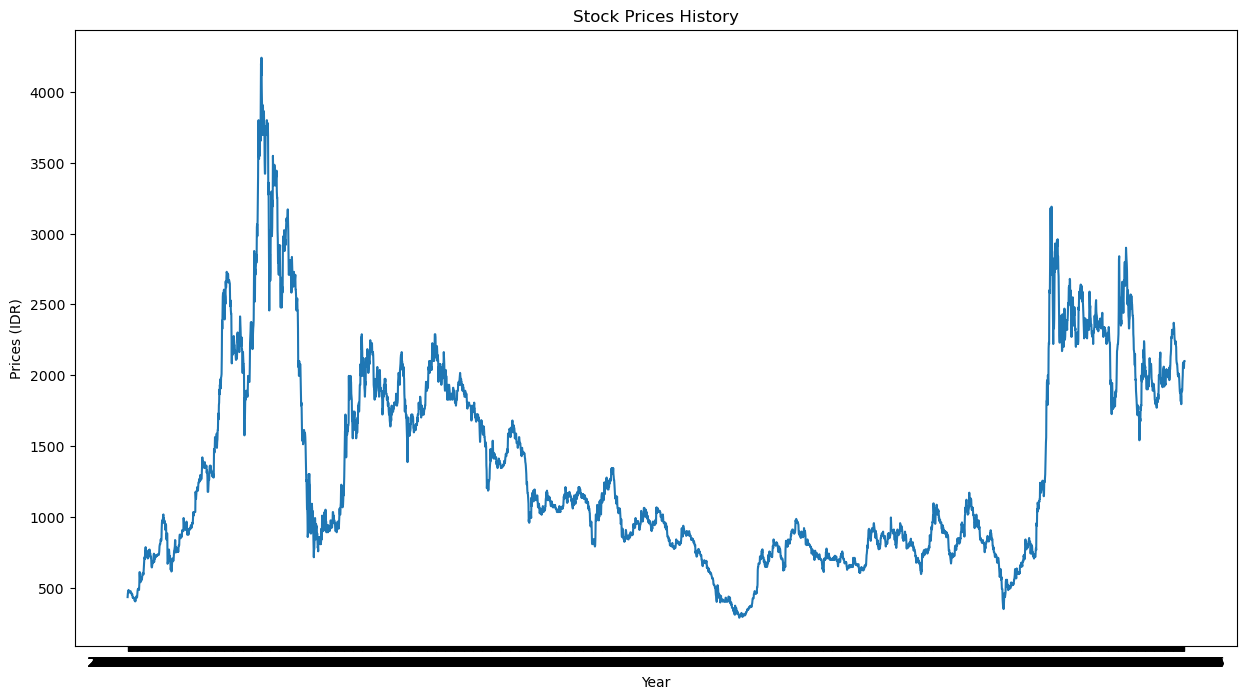

In [7]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(train['Close'])
plt.xlabel('Year')
plt.ylabel('Prices (IDR)')

In [8]:
scaled_data

array([[0.03681223],
       [0.04318393],
       [0.04636977],
       ...,
       [0.44577801],
       [0.45842061],
       [0.45842061]])

In [9]:
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60: i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Processing data testing that will be used to test the performance of the LSTM model in predicting stock prices
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
#Function to count the RMSE of the model
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [12]:
# membangun model LSTM
model_lstm=Sequential()
model_lstm.add(LSTM(50,return_sequences=True,input_shape=(np.shape(X_train)[1],1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile and train the LSTM model that has been created with pre-processed training data.
model_lstm.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['mae', 'mse']) 
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Epoch 1/50
35/35 - 6s - loss: 0.0831 - mae: 0.0637 - mse: 0.0123 - val_loss: 0.0410 - val_mae: 0.0304 - val_mse: 0.0022 - 6s/epoch - 162ms/step
Epoch 2/50
35/35 - 2s - loss: 0.0291 - mae: 0.0189 - mse: 8.8158e-04 - val_loss: 0.0352 - val_mae: 0.0266 - val_mse: 0.0016 - 2s/epoch - 49ms/step
Epoch 3/50
35/35 - 2s - loss: 0.0243 - mae: 0.0156 - mse: 6.1767e-04 - val_loss: 0.0321 - val_mae: 0.0240 - val_mse: 0.0013 - 2s/epoch - 49ms/step
Epoch 4/50
35/35 - 2s - loss: 0.0229 - mae: 0.0148 - mse: 5.3742e-04 - val_loss: 0.0315 - val_mae: 0.0239 - val_mse: 0.0013 - 2s/epoch - 50ms/step
Epoch 5/50
35/35 - 2s - loss: 0.0220 - mae: 0.0140 - mse: 5.0067e-04 - val_loss: 0.0298 - val_mae: 0.0222 - val_mse: 0.0011 - 2s/epoch - 49ms/step
Epoch 6/50
35/35 - 2s - loss: 0.0214 - mae: 0.0135 - mse: 4.7391e-04 - val_loss: 0.0274 - val_mae: 0.0202 - val_mse: 9.5233e-04 - 2s/epoch - 49ms/step
Epoch 7/50
35/35 - 2s - loss: 0.0212 - mae: 0.0135 - mse: 4.6109e-04 - val_loss: 0.0324 - val_mae: 0.0257 - val_mse: 

In [13]:
# membangun model GRU
model_gru=Sequential()
model_gru.add(GRU(50,return_sequences=True,input_shape=(np.shape(X_train)[1],1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

model_gru.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['mae', 'mse']) 
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Epoch 1/50
35/35 - 5s - loss: 0.0822 - mae: 0.0643 - mse: 0.0119 - val_loss: 0.0311 - val_mae: 0.0254 - val_mse: 0.0012 - 5s/epoch - 156ms/step
Epoch 2/50
35/35 - 2s - loss: 0.0195 - mae: 0.0133 - mse: 4.1116e-04 - val_loss: 0.0218 - val_mae: 0.0161 - val_mse: 6.0067e-04 - 2s/epoch - 55ms/step
Epoch 3/50
35/35 - 2s - loss: 0.0166 - mae: 0.0102 - mse: 2.8827e-04 - val_loss: 0.0206 - val_mae: 0.0155 - val_mse: 5.1850e-04 - 2s/epoch - 54ms/step
Epoch 4/50
35/35 - 2s - loss: 0.0160 - mae: 0.0101 - mse: 2.6757e-04 - val_loss: 0.0208 - val_mae: 0.0156 - val_mse: 5.2312e-04 - 2s/epoch - 55ms/step
Epoch 5/50
35/35 - 2s - loss: 0.0155 - mae: 0.0100 - mse: 2.4714e-04 - val_loss: 0.0189 - val_mae: 0.0143 - val_mse: 4.4232e-04 - 2s/epoch - 55ms/step
Epoch 6/50
35/35 - 2s - loss: 0.0152 - mae: 0.0101 - mse: 2.4070e-04 - val_loss: 0.0181 - val_mae: 0.0137 - val_mse: 4.0701e-04 - 2s/epoch - 55ms/step
Epoch 7/50
35/35 - 2s - loss: 0.0145 - mae: 0.0095 - mse: 2.1685e-04 - val_loss: 0.0171 - val_mae: 0.

In [14]:
# membangun model bilstm
model_bilstm=Sequential()
model_bilstm.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(np.shape(X_train)[1],1))))
model_bilstm.add(Bidirectional(LSTM(50)))
model_bilstm.add(Dense(1))
input_shape = x_test.shape  
model_bilstm.build(input_shape)

model_bilstm.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['mae', 'mse']) 
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Epoch 1/50
35/35 - 11s - loss: 0.0766 - mae: 0.0571 - mse: 0.0085 - val_loss: 0.0498 - val_mae: 0.0382 - val_mse: 0.0033 - 11s/epoch - 312ms/step
Epoch 2/50
35/35 - 3s - loss: 0.0313 - mae: 0.0214 - mse: 0.0011 - val_loss: 0.0392 - val_mae: 0.0316 - val_mse: 0.0019 - 3s/epoch - 93ms/step
Epoch 3/50
35/35 - 3s - loss: 0.0225 - mae: 0.0143 - mse: 5.1992e-04 - val_loss: 0.0261 - val_mae: 0.0194 - val_mse: 8.5791e-04 - 3s/epoch - 94ms/step
Epoch 4/50
35/35 - 3s - loss: 0.0191 - mae: 0.0120 - mse: 3.7845e-04 - val_loss: 0.0249 - val_mae: 0.0186 - val_mse: 7.8073e-04 - 3s/epoch - 96ms/step
Epoch 5/50
35/35 - 3s - loss: 0.0183 - mae: 0.0115 - mse: 3.4950e-04 - val_loss: 0.0296 - val_mae: 0.0240 - val_mse: 0.0011 - 3s/epoch - 95ms/step
Epoch 6/50
35/35 - 3s - loss: 0.0186 - mae: 0.0121 - mse: 3.5299e-04 - val_loss: 0.0225 - val_mae: 0.0170 - val_mse: 6.3720e-04 - 3s/epoch - 92ms/step
Epoch 7/50
35/35 - 3s - loss: 0.0171 - mae: 0.0108 - mse: 3.0171e-04 - val_loss: 0.0208 - val_mae: 0.0156 - val

In [15]:
# Reshape X_train for Linear Regression
X_train_linear = X_train.reshape(X_train.shape[0], -1)

# Reshape X_test for Linear Regression
X_test_linear = x_test.reshape(x_test.shape[0], -1)

# Build and train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_linear, y_train)

LinearRegression()

In [16]:
# Determine the test data start index
test_data_percentage = 0.2
test_data_length = int(test_data_percentage * len(X_train))
test_data_start_index = len(X_train) - test_data_length

# Extract the test data
X_test = X_train[test_data_start_index:]
y_test = y_train[test_data_start_index:]

In [17]:
# Reshape X_test for Linear Regression
X_test_linear = X_test.reshape(X_test.shape[0], -1)

# Calculate the RMSE for the LSTM model
rmse_lstm = mean_squared_error(y_test, model_lstm.predict(X_test))

# Calculate the MSE for the LSTM model
mse_lstm = mean_squared_error(y_test, model_lstm.predict(X_test))

# Calculate the MAE for the LSTM model
mae_lstm = mean_absolute_error(y_test, model_lstm.predict(X_test))

# Calculate the RMSE for the GRU model
rmse_gru = mean_squared_error(y_test, model_gru.predict(X_test))

# Calculate the MSE for the GRU model
mse_gru = mean_squared_error(y_test, model_gru.predict(X_test))

# Calculate the MAE for the GRU model
mae_gru = mean_absolute_error(y_test, model_gru.predict(X_test))

# Calculate the RMSE for the BiLSTM model
rmse_bilstm = mean_squared_error(y_test, model_bilstm.predict(X_test))

# Calculate the MSE for the BiLSTM model
mse_bilstm = mean_squared_error(y_test, model_bilstm.predict(X_test))

# Calculate the MAE for the BiLSTM model
mae_bilstm = mean_absolute_error(y_test, model_bilstm.predict(X_test))

# Calculate the RMSE for the linear regression model
rmse_linear = mean_squared_error(y_test, model_lr.predict(X_test_linear))

# Calculate the MSE for the linear regression model
mse_linear = mean_squared_error(y_test, model_lr.predict(X_test_linear))

# Calculate the MAE for the linear regression model
mae_linear = mean_absolute_error(y_test, model_lr.predict(X_test_linear))


27/27 [==============================] - 0s 18ms/step


In [18]:
print("LSTM - RMSE:", rmse_lstm)
print("LSTM - MSE:", mse_lstm)
print("LSTM - MAE:", mae_lstm)

print("GRU - RMSE:", rmse_gru)
print("GRU - MSE:", mse_gru)
print("GRU - MAE:", mae_gru)

print("BiLSTM - RMSE:", rmse_bilstm)
print("BiLSTM - MSE:", mse_bilstm)
print("BiLSTM - MAE:", mae_bilstm)

print("Linear Regression - RMSE:", rmse_linear)
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - MAE:", mae_linear)

LSTM - RMSE: 0.00031079409906940923
LSTM - MSE: 0.00031079409906940923
LSTM - MAE: 0.011171851119264126
GRU - RMSE: 0.000301142030903527
GRU - MSE: 0.000301142030903527
GRU - MAE: 0.012245921945389308
BiLSTM - RMSE: 0.00029175939289619675
BiLSTM - MSE: 0.00029175939289619675
BiLSTM - MAE: 0.010965806607553329
Linear Regression - RMSE: 0.0002605159851376733
Linear Regression - MSE: 0.0002605159851376733
Linear Regression - MAE: 0.010222278678619


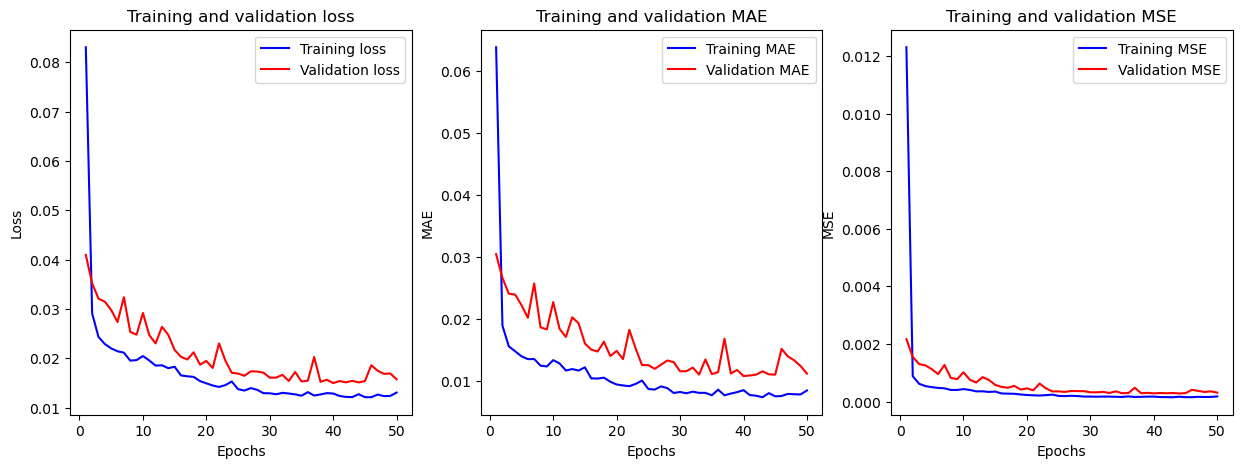

In [19]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
mae = history_lstm.history['mae']
val_mae = history_lstm.history['val_mae']
mse = history_lstm.history['mse']
val_mse = history_lstm.history['val_mse']

# Plot the training and validation metrics
epochs = range(1, len(loss) + 1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(epochs, loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mae, 'b', label='Training MAE')
ax2.plot(epochs, val_mae, 'r', label='Validation MAE')
ax2.set_title('Training and validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(epochs, mse, 'b', label='Training MSE')
ax3.plot(epochs, val_mse, 'r', label='Validation MSE')
ax3.set_title('Training and validation MSE')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')
ax3.legend()

plt.show()

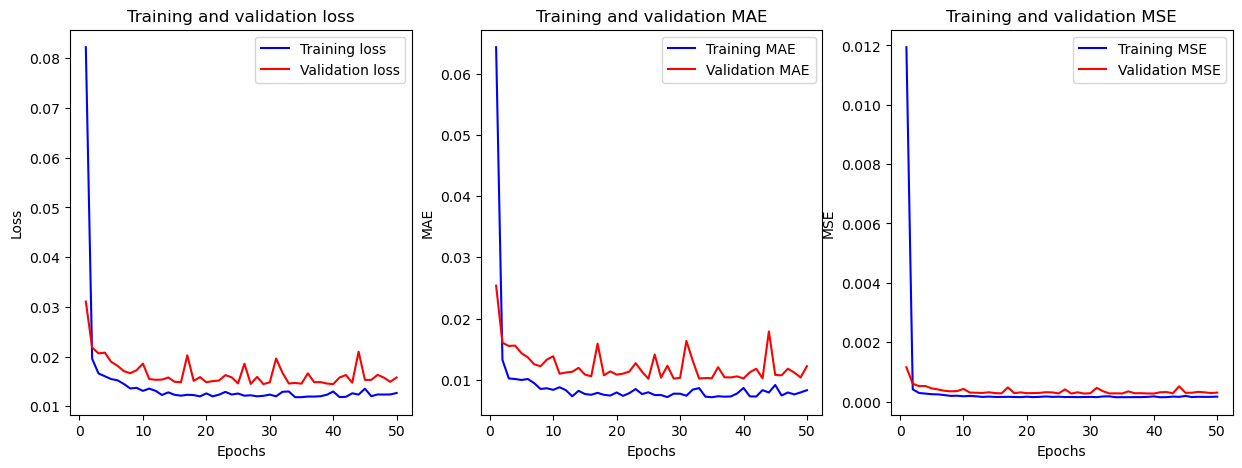

In [20]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']
mae = history_gru.history['mae']
val_mae = history_gru.history['val_mae']
mse = history_gru.history['mse']
val_mse = history_gru.history['val_mse']

# Plot the training and validation metrics
epochs = range(1, len(loss) + 1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(epochs, loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mae, 'b', label='Training MAE')
ax2.plot(epochs, val_mae, 'r', label='Validation MAE')
ax2.set_title('Training and validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(epochs, mse, 'b', label='Training MSE')
ax3.plot(epochs, val_mse, 'r', label='Validation MSE')
ax3.set_title('Training and validation MSE')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')
ax3.legend()

plt.show()

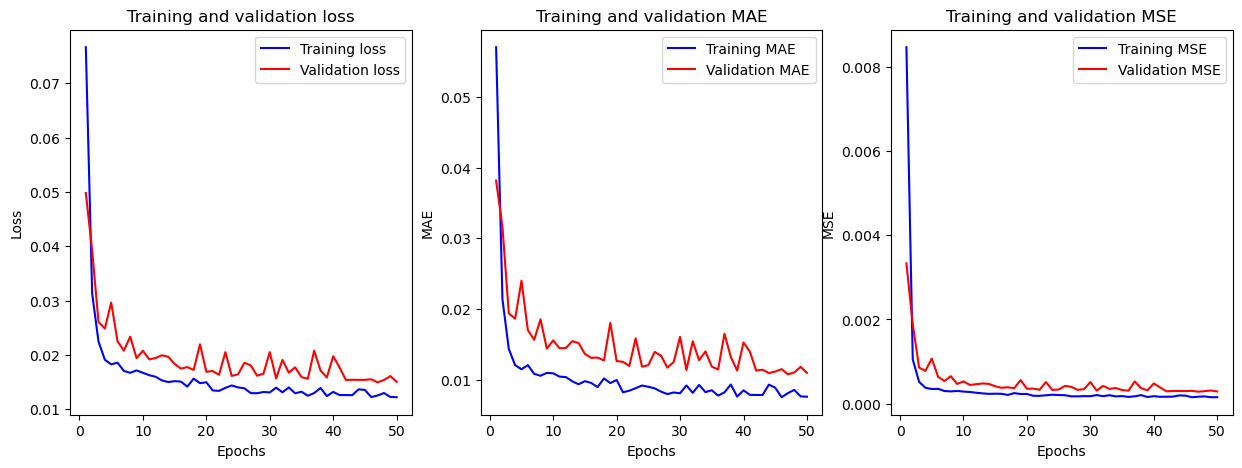

In [21]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
loss = history_bilstm.history['loss']
val_loss = history_bilstm.history['val_loss']
mae = history_bilstm.history['mae']
val_mae = history_bilstm.history['val_mae']
mse = history_bilstm.history['mse']
val_mse = history_bilstm.history['val_mse']

# Plot the training and validation metrics
epochs = range(1, len(loss) + 1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(epochs, loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mae, 'b', label='Training MAE')
ax2.plot(epochs, val_mae, 'r', label='Validation MAE')
ax2.set_title('Training and validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.legend()

ax3.plot(epochs, mse, 'b', label='Training MSE')
ax3.plot(epochs, val_mse, 'r', label='Validation MSE')
ax3.set_title('Training and validation MSE')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')
ax3.legend()

plt.show()

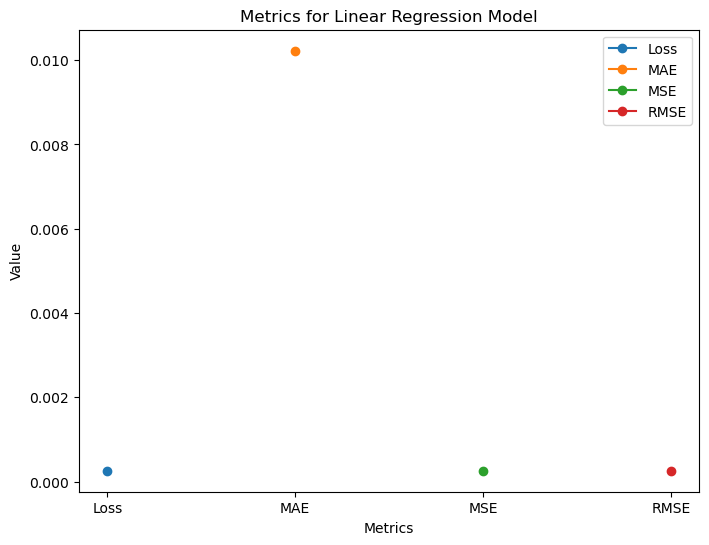

In [22]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = {
    'Loss': mse_linear,  # MSE as the loss for LR model
    'MAE': mae_linear,
    'MSE': mse_linear,
    'RMSE': rmse_linear
}

# Plot the metrics
fig, ax = plt.subplots(figsize=(8, 6))

for metric, value in metrics.items():
    ax.plot(metric, value, marker='o', label=metric)

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Metrics for Linear Regression Model')
ax.legend()

plt.show()

Prediction

In [23]:
# Make predictions on testing data with LSTM Model
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Make predictions on testing data with GRU Model
predictions_gru = model_gru.predict(X_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

# Make predictions on testing data with BiLSTM Model
predictions_bilstm = model_bilstm.predict(X_test)
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)

27/27 [==============================] - 0s 17ms/step


In [24]:
y_test = values[training_data_len:]
y_test = y_test.reshape(-1)

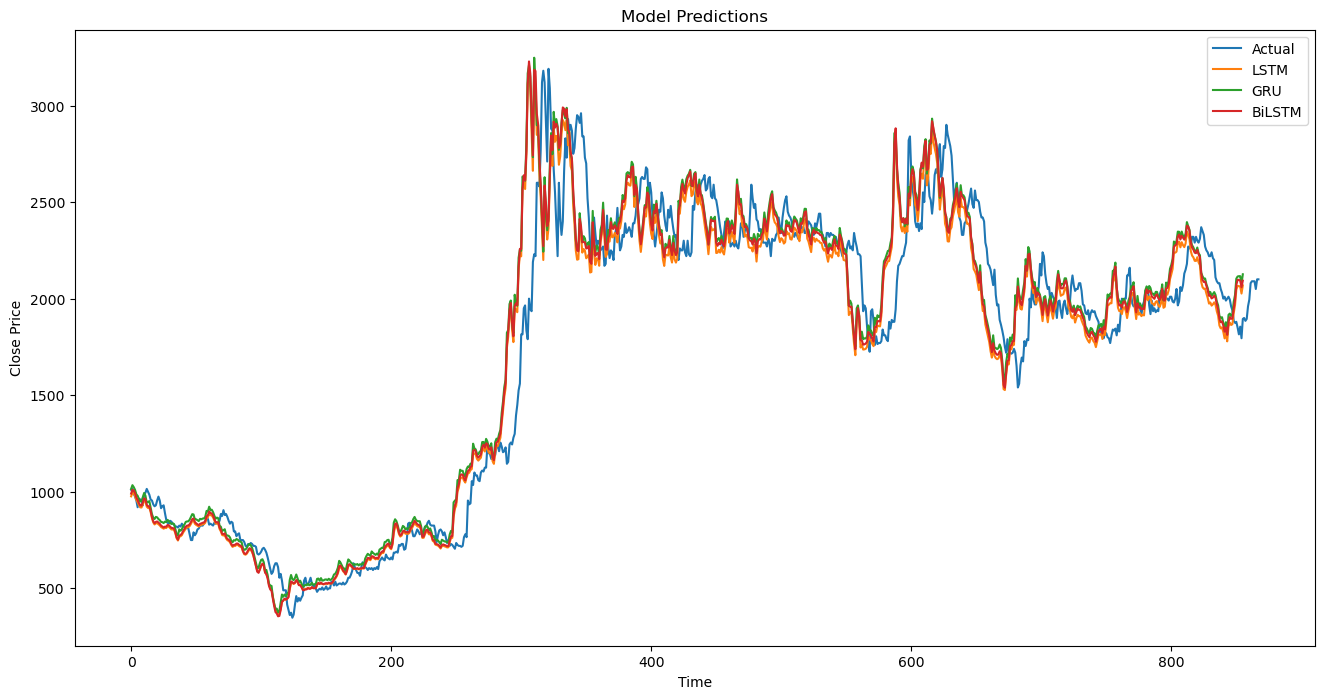

In [25]:
plt.figure(figsize=(16, 8))
plt.title('Model Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.plot(y_test, label='Actual')
plt.plot(predictions_lstm, label='LSTM')
plt.plot(predictions_gru, label='GRU')
plt.plot(predictions_bilstm, label='BiLSTM')
plt.legend()
plt.show()